In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,make_scorer,ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [12]:
MY_PC = '.'
MY_DRIVE = '/content/drive/MyDrive/KFUPM/ICS485 Machine Learning/machine-learning'


working_on = MY_PC

# Reading the data

In [13]:
train_data = pd.read_csv(working_on + "/preprocessed_data/train_data.csv")
val_data = pd.read_csv(working_on + "/preprocessed_data/val_data.csv")
test_data = pd.read_csv(working_on + "/preprocessed_data/test_data.csv")

In [14]:
train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15_R1,X15_R2,X15_R3,Y
0,1.290226,2.112607,-0.522884,1.115542,-0.016684,2.512688,-0.497937,-0.005048,0.484781,1.378068,...,0,0,0,0,0,0,1,0,0,Toyota
1,0.380248,0.028934,-0.188861,2.250045,2.066725,0.924807,0.664973,0.888840,-0.010940,0.422940,...,0,0,0,0,0,0,1,0,0,BMW
2,-1.743034,-0.000464,0.590527,-0.120055,0.230500,-1.058322,0.831103,-1.111766,-1.229588,-0.635492,...,0,0,0,0,0,0,0,1,0,Honda
3,1.810213,-0.512413,-0.077520,0.312404,-0.316836,0.834421,0.930781,-0.090180,-0.713212,0.876429,...,0,0,0,0,1,0,1,0,0,GMC
4,0.706515,0.948202,-1.413614,-0.906344,-0.705268,2.775420,-0.165677,1.016538,0.815262,1.648586,...,0,0,0,0,0,0,1,0,0,Toyota


,Column,Non-Null Count,Dtype,Unique Values
Y,Y,4250,object,6
X1,X1,4250,float64,1295
X2,X2,4250,float64,361
X3,X3,4250,float64,49
X4,X4,4250,float64,225
X5,X5,4250,float64,301
X6,X6,4250,float64,1675
X7,X7,4250,float64,164
X8,X8,4250,float64,132
X9,X9,4250,float64,241


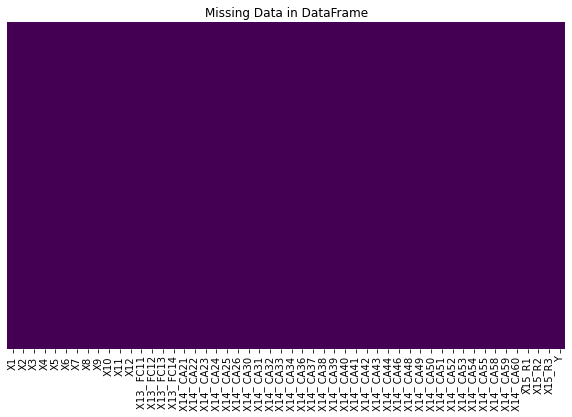

In [15]:

def display_dataframe_summary(dataframe, sort_by='Column'):

    summary = pd.DataFrame({
        'Column': dataframe.columns,
        'Non-Null Count': dataframe.notnull().sum(),
        'Dtype': dataframe.dtypes,
        'Unique Values': dataframe.nunique()
    })

    # Extracting numerical part from column names for sorting
    summary['Sort Key'] = summary['Column'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

    # Sorting the summary DataFrame
    if sort_by == 'Column':
        summary = summary.sort_values(by='Sort Key', ascending=True)
    else:
        summary = summary.sort_values(by=sort_by, ascending=True)

    summary = summary.drop('Sort Key', axis=1)  # Remove the auxiliary sort key column

    # Display the summary
    display(summary)

    # Plotting missing data
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title('Missing Data in DataFrame')
    plt.show()

# Call the function with your DataFrame
display_dataframe_summary(train_data, sort_by='Column')


In [16]:
classes = train_data["Y"].unique()
number_of_classes = train_data["Y"].nunique()
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns

print(f"The classes is: {classes}")
print(f"Number of classes: {number_of_classes}")
print(categorical_cols)

The classes is: ['Toyota' 'BMW' 'Honda' 'GMC' 'Mercedes' 'Ford']
Number of classes: 6
Index(['Y'], dtype='object')


In [17]:
X_train = train_data.drop('Y', axis=1).to_numpy()
y_train = train_data['Y'].to_numpy()

X_val = val_data.drop('Y', axis=1).to_numpy()
y_val = val_data['Y'].to_numpy()

X_test = test_data.drop('Y', axis=1).to_numpy()
y_test = test_data['Y'].to_numpy()


# Building SVM Model

In [18]:
# Will be using cross validation, therefore merge the train and val 
X_train = np.vstack([X_train, X_val])
y_train = np.concatenate((y_train, y_val), axis = 0)

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3]
}

# Create an SVM model
svm_model = SVC(random_state=777)

# Use F1-macro as the scoring metric
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Create a GridSearchCV object with F1-macro scoring
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring=f1_macro_scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best params for SVM: {best_params}')

SVM_model = SVC(**best_params, random_state=777)
SVM_model.fit(X_train, y_train)

Best params for SVM: {'C': 10, 'degree': 2, 'kernel': 'rbf'}


SVC(C=10, degree=2, random_state=777)

# Building LogisticRegression Model
Explanation for solvers types:
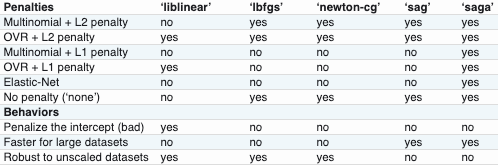


In [19]:
# Define the parameter grid for logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','lbfgs','newton-cg', 'saga']
}

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=777)

# Use F1-macro as the scoring metric
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Create a GridSearchCV object with F1-macro scoring
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, scoring=f1_macro_scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f'Best params for Logistic Regression: {best_params}')

LogisticRegression_model = LogisticRegression(**best_params, random_state=777)
LogisticRegression_model.fit(X_train, y_train)


C:\Users\Elyas Almubarak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Elyas Almubarak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Elyas Almubarak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Elyas Almubarak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Elyas Almubarak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Elyas Almubarak\anaconda3\lib\site-packages\sklearn

C:\Users\Elyas Almubarak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Elyas Almubarak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Elyas Almubarak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Elyas Almubarak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWa

Best params for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


LogisticRegression(C=10, random_state=777, solver='newton-cg')

# Showing results model performance on testing set

In [24]:
def evaluate_model(model,X_test,y_test):

    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = classes)
    
    print("Confusion Matrix:")
    cm_display.plot()
    plt.show()
    
    report = classification_report(y_test, y_pred, target_names=classes)
    print(report)

SVM Model Performance on Testing Set:
Confusion Matrix:


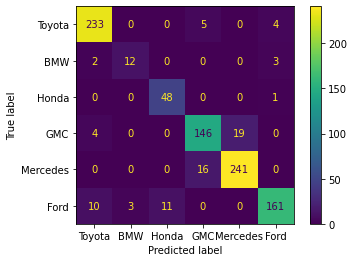

              precision    recall  f1-score   support

      Toyota       0.94      0.96      0.95       242
         BMW       0.80      0.71      0.75        17
       Honda       0.81      0.98      0.89        49
         GMC       0.87      0.86      0.87       169
    Mercedes       0.93      0.94      0.93       257
        Ford       0.95      0.87      0.91       185

    accuracy                           0.92       919
   macro avg       0.88      0.89      0.88       919
weighted avg       0.92      0.92      0.91       919



In [25]:
print('SVM Model Performance on Testing Set:')
evaluate_model(SVM_model,X_test,y_test)

Logistic Regression Model Performance on Testing Set:
Confusion Matrix:


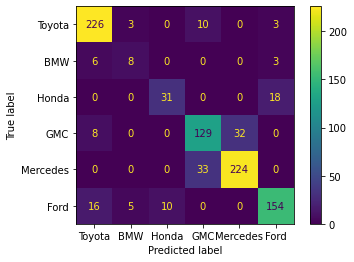

              precision    recall  f1-score   support

      Toyota       0.88      0.93      0.91       242
         BMW       0.50      0.47      0.48        17
       Honda       0.76      0.63      0.69        49
         GMC       0.75      0.76      0.76       169
    Mercedes       0.88      0.87      0.87       257
        Ford       0.87      0.83      0.85       185

    accuracy                           0.84       919
   macro avg       0.77      0.75      0.76       919
weighted avg       0.84      0.84      0.84       919



In [26]:
print('Logistic Regression Model Performance on Testing Set:')
evaluate_model(LogisticRegression_model,X_test,y_test)